# 회귀분석/ 자동차 연비 예측 분석 프로젝트

In [1]:
import warnings

warnings.filterwarnings(action='ignore') 

## 1) 데이터 수집

- https://archive.ics.uci.edu/ml/index.php에서 자동차 연비 데이터 다운로드하기
- Data Folder를 클릭하여 ‘auto-mpg.data’를 다운로드
- CSV 파일로 변경하기
- 행을 삽입하고 열 이름으로 mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, car_name을 각각 입력
- 파일을 ‘auto-mpg.csv’로 저장

In [2]:
import numpy as np
import pandas as pd 

data_df = pd.read_csv('./auto-mpg.csv', header=0, engine='python')

## 2) 데이터 준비 및 탐색

In [3]:
print(' 데이터셋 크기 : ', data_df.shape)

data_df.head()

 데이터셋 크기 :  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


- 데이터셋의 형태data_df.shape를 확인해보면, 398행과 9열로 구성되어 있음 398개 데이터에 9개 컬럼이 있으므로 파일 내용이 DataFrame으로 잘 저장되었다는 것을 알 수 있음 데이터 5개를 출력하여 내용을 확인data_df.head( ).

### -분석에 필요 없는 컬럼을 제거하고 데이터셋의 내용을 확인

In [4]:
data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)

- 피처 중에서 car_name, origin, horsepower는 분석에 사용하지 않으므로 제거data_ df.drop( ) 후 확인data_df.head( ).

In [5]:
print(' 데이터세트 크기 : ', data_df.shape)

data_df.head()

 데이터세트 크기 :  (398, 6)


,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


- 분석에 사용할 데이터셋의 형태data_df.shape를 확인

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


- 분석에 사용할 데이터셋의 형태data_df.shape를 확인

## 3) 분석 모델 구축

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

lr = LinearRegression()

lr.fit(X_train, Y_train)

Y_predict = lr.predict(X_test)

- 사이킷런을 사용하여 머신러닝 선형 회귀 분석을 하기 위한 LinearRegression과 데이터셋 분리 작업을 위한train_test_split, 성능 측정을 위한 평가 지표인 mean_squared_ error, r2_score를 임포트
- 자동차 연비를 예측하는 것이 프로젝트의 목표이므로, mpg 피처를 회귀식의 종속 변수 Y로 설정하고, mpg를 제외한나머지 피처를 독립 변수 X로 설정
- 데이터를 7:3 비율 test_size=0.3로 분할하여 train_test_split( ) 학습 데이터와 평가 데이터로 설정선형 회귀 분석 모델 객체인 lr을 생성
- 학습 데이터 XX_train와 YY_train를 가지고 학습을 수행fit( )
- 평가 데이터 XX_test로 예측을 수행하여predict( ) 예측값 YY_predict를 구함

## 4) 결과 분석 및 시각화

In [8]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 12.278, RMSE : 3.504
R^2(Variance score) : 0.808


- 회귀 분석은 지도 학습이므로 평가 데이터 X에 대한 YY_test를 이미 알고 있음평가 데이터의 결과값 Y_test과 예측 결과값 Y_predict의 오차를 계산하여 모델을 평가하는데, mean_ squared_error()를 이용하여 평가 지표 MSE를 구하고 구한 값의 제곱근을 계산하여 평가 지표 RMSE를 구한다. 그리고 r2_score()를이용하여 평가 지표 R2를 구함

In [9]:
print('Y 절편 값: ',  np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


- 선형 회귀의 Y절편 lr.intercept_과 각 피처의 회귀 계수lr.coef_를 확인

In [10]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

- 회귀 모델에서 구한 회귀 계수 값 lr.coef_과 피처 이름 X.columns을 묶어서 Series 자료 형으로 만들고, 회귀 계수 값을기준으로 내림차순 ascending = False으로 정렬 sort_values( )하여 회귀 계수 값이 큰 항목을 확인

#### 회귀 모델 결과로 자동차 연비를 예측하는 회귀식

Ympg = -0.14Xcylinders + 0.01Xdisplacement - 0.01Xweight + 0.20Xacceleration + 0.76Xmodel_year – 17.55

### - 회귀 분석 결과를 산점도 + 선형 회귀 그래프로 시각화하기

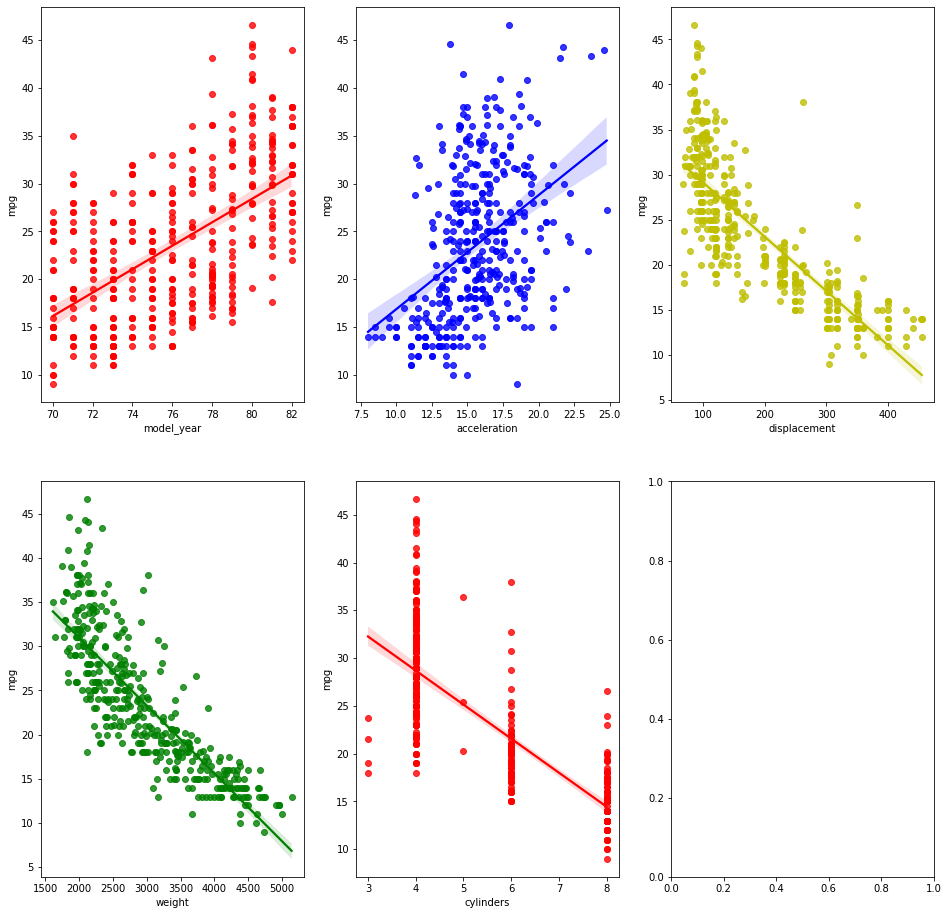

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)

x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

- 시각화에 필요한 모듈을 임포트
- subplots()를 사용하여 독립 변수인 5개 피처 ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']와 종속 변수인 연비 mpg와의 회귀 관계를 보여주는 5개 그래프를 2행 3열 구조로 나타낸다.

###   <<<< 연비 예측하기  >>>>

In [12]:
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))

연비를 예측하고 싶은 차의 정보를 입력해주세요.
cylinders : 8
displacement : 350
weight : 3200
acceleration : 22
model_year : 99


In [13]:
mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1 , model_year_1]])

In [14]:
print("이 자동차의 예상 연비(mpg)는 %.2f 입니다." %mpg_predict)

이 자동차의 예상 연비(mpg)는 41.32 입니다.
